In [16]:
# Importing essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This magic command makes your plots display directly in the notebook
%matplotlib inline

print("All libraries imported successfully!")

All libraries imported successfully!


In [17]:
# Load the dataset from the CSV file in your folder
df = pd.read_csv('KaggleV2-May-2016.csv')

# Display the first 5 rows to get a feel for the data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
print("Dataset Shape:", df.shape)
print("\n")

df.info()
print("\n")

df.describe()

Dataset Shape: (110527, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
print("Missing Values in Each Column:")
print(df.isnull().sum())
print("\n")


Missing Values in Each Column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64




In [20]:
print("Number of duplicate rows:", df.duplicated().sum())
print("\n")

Number of duplicate rows: 0




In [21]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
print("Column renamed to 'No_show'")
print("\n")

Column renamed to 'No_show'




In [22]:
print("Values in 'No_show' column:")
print(df['No_show'].value_counts())

Values in 'No_show' column:
No_show
No     88208
Yes    22319
Name: count, dtype: int64


In [23]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.normalize()
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.normalize()


In [24]:
df['WaitingTimeDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


In [25]:
df['Appointment_DOW'] = df['AppointmentDay'].dt.day_name()


In [26]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 120], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [27]:
df[['ScheduledDay', 'AppointmentDay', 'WaitingTimeDays', 'Appointment_DOW', 'AgeGroup']].head()


,ScheduledDay,AppointmentDay,WaitingTimeDays,Appointment_DOW,AgeGroup
0,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,Friday,Senior
1,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,Friday,Adult
2,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,Friday,Senior
3,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,Friday,Child
4,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,0,Friday,Adult


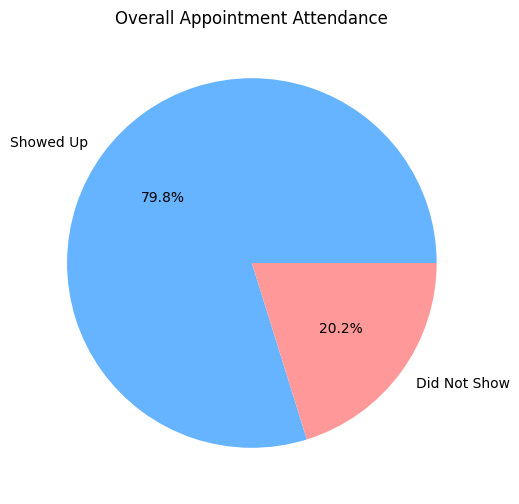

In [28]:
show_up_count = df['No_show'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(show_up_count, labels=['Showed Up', 'Did Not Show'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Overall Appointment Attendance')
plt.show()

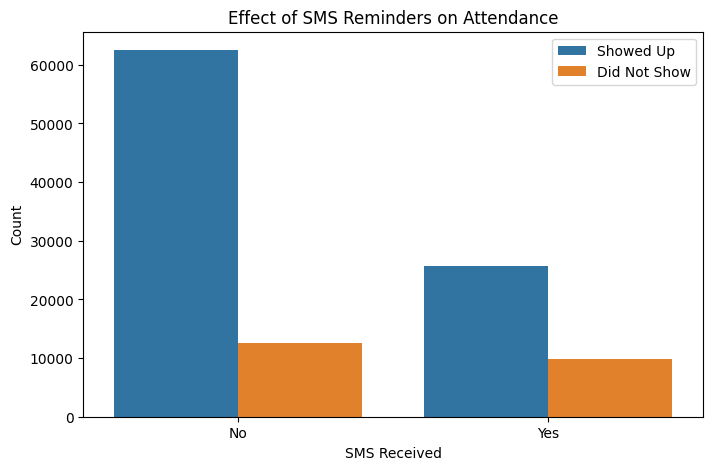

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['SMS_received'], hue=df['No_show'])
plt.title('Effect of SMS Reminders on Attendance')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.legend(['Showed Up', 'Did Not Show'])
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_42644\1967306075.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_plot_data = df.groupby(['AgeGroup', 'No_show']).size().unstack()


<Figure size 1200x500 with 0 Axes>

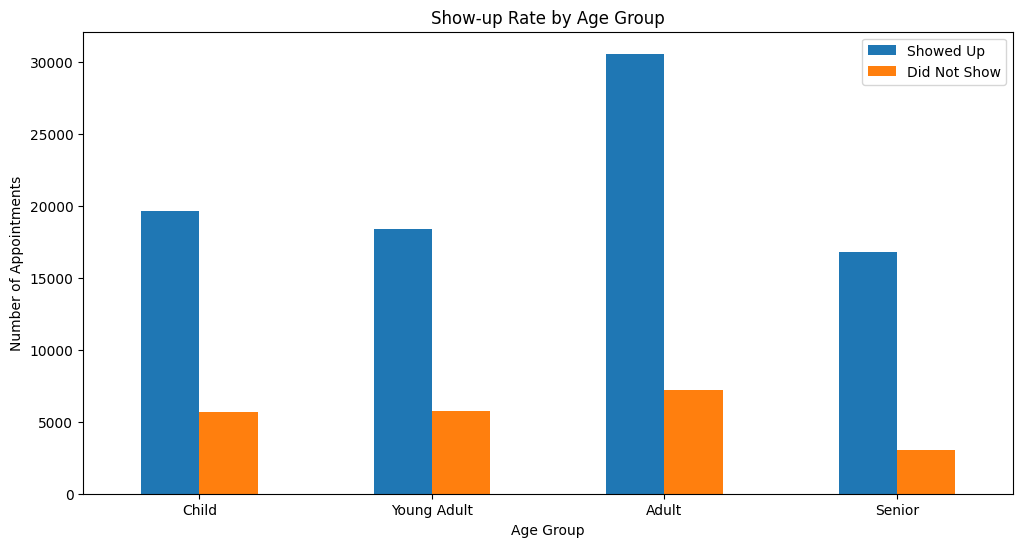

In [30]:
plt.figure(figsize=(12,5))
age_plot_data = df.groupby(['AgeGroup', 'No_show']).size().unstack()
age_plot_data.plot(kind='bar', figsize=(12,6))
plt.title('Show-up Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Appointments')
plt.legend(['Showed Up', 'Did Not Show'])
plt.xticks(rotation=0)
plt.show()